# Execute aqui primeiro

In [5]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Morfologia III

### Operações morfológicas em escala de cinza
---

As operações tem como objetivo modificar os seus vizinhos de forma que busque elementos da imagem como objetos e o fundo sejam realçado.
Por exemplo, na dilatação é utilizado o valor maximo dos vizinhos, já erosão utiliza o conceito de minização. Logo, na função abaixo tem as operações que são utilizados normalmente. 

In [14]:
def operacoes_morfologicas(path):
    
    img = cv.imread(path, cv.IMREAD_GRAYSCALE)
    kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, (5, 5))

    # 4.1 dilatação/erosão.
    dil = cv.dilate(img, kernel)
    ero = cv.erode(img, kernel)
    
    # 4.2 abertura/fechamento
    open_ = cv.morphologyEx(img, cv.MORPH_OPEN, kernel)
    close = cv.morphologyEx(img, cv.MORPH_CLOSE, kernel)
    
    # 4.3 atualização
    atuali = cv.erode(cv.dilate(img, kernel), kernel)

    # 4.4 gradiente morfológico
    grad = cv.morphologyEx(img, cv.MORPH_GRADIENT, kernel)

    # 4.5 top-hat/bottom-hat
    tophat = cv.morphologyEx(img, cv.MORPH_TOPHAT, kernel)
    blackhat = cv.morphologyEx(img, cv.MORPH_BLACKHAT, kernel)

    # 4.6 granulometria
    granulometria = []
    sizes = range(1, 15)
    for size in sizes:
        k = cv.getStructuringElement(cv.MORPH_ELLIPSE, (size, size))
        opened = cv.morphologyEx(img, cv.MORPH_OPEN, k)
        diff = cv.subtract(img, opened)
        granulometria.append(np.sum(diff))

    # 4.7 segmentação de textura
    smoothed = cv.morphologyEx(img, cv.MORPH_OPEN, kernel)
    texture = cv.subtract(img, smoothed)
    _, segmented = cv.threshold(texture, 20, 255, cv.THRESH_BINARY)
    
    titles = ['Original', '4.1 Dilatação', '4.1 Erosão',
              '4.2 Abertura', '4.2 Fechamento', '4.3 Atualização',
              '4.4 Gradiente', '4.5 Top-Hat', '4.5 Black-Hat',
              '4.7 Segmentação de Textura']
    images = [img, dil, ero, open_, close, atuali, grad, tophat, blackhat, segmented]

    plt.figure(figsize=(15, 8))
    for i in range(len(images)):
        plt.subplot(3, 4, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(titles[i])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

    # Plot separado para granulometria
    plt.figure(figsize=(6, 4))
    plt.plot(sizes, granulometria, marker='o')
    plt.title("4.6 Granulometria")
    plt.xlabel("Tamanho do elemento estruturante")
    plt.ylabel("Soma das diferenças")
    plt.grid(True)
    plt.show()

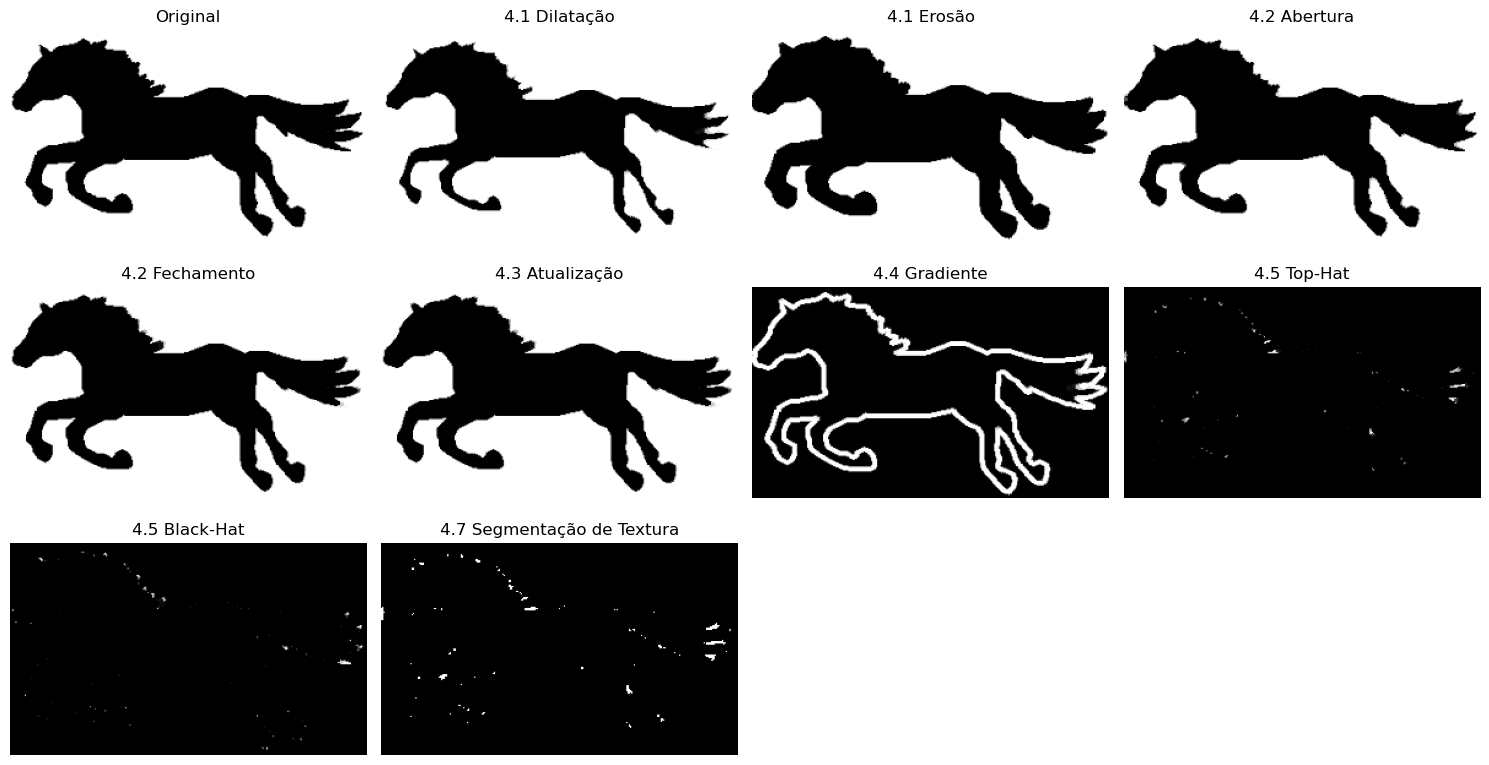

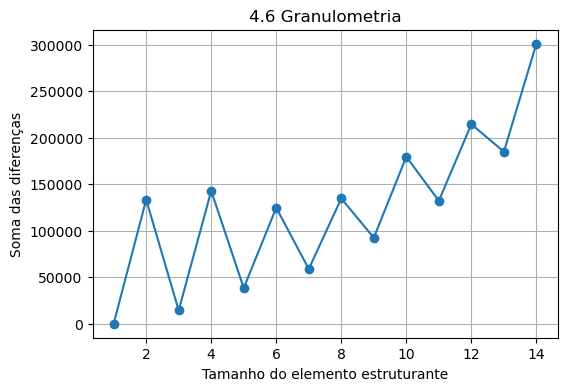

In [15]:
operacoes_morfologicas('img/horse.png')

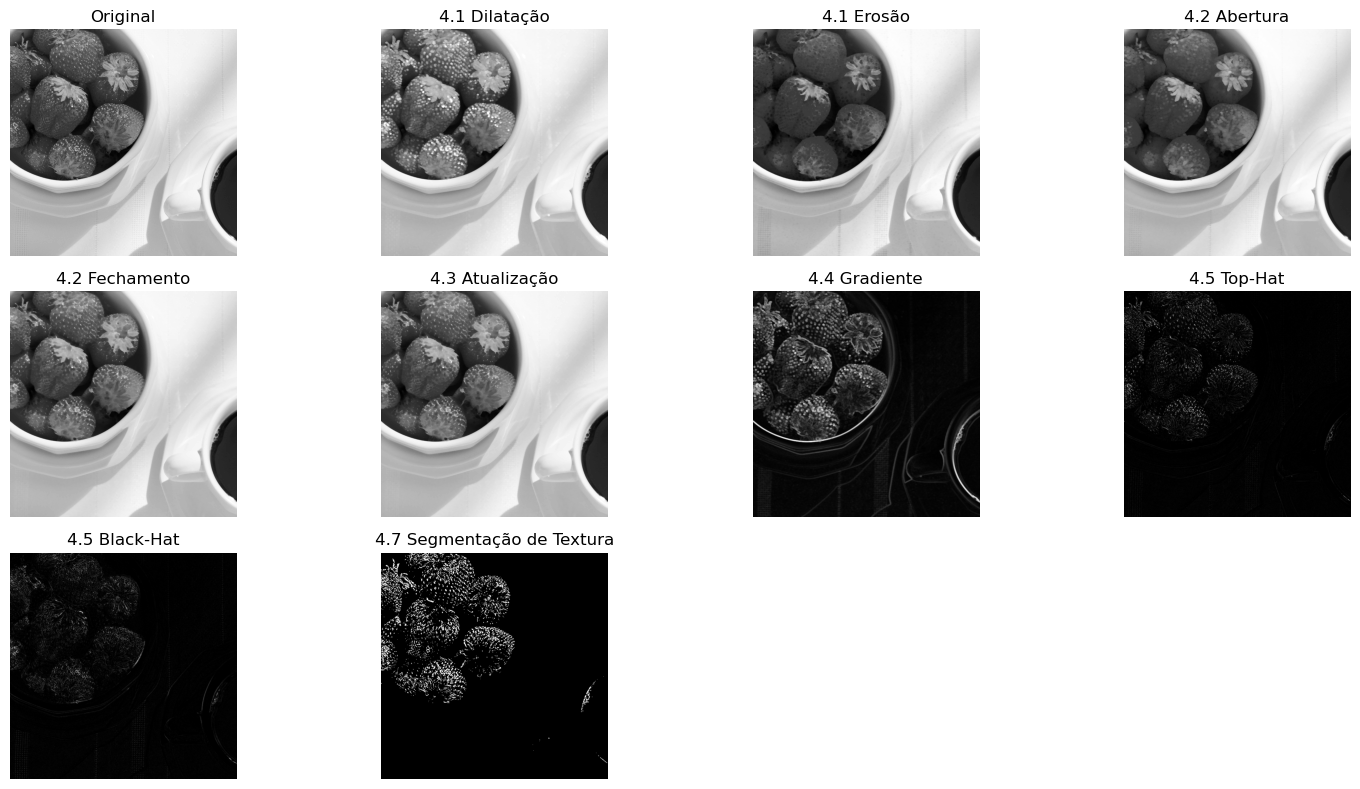

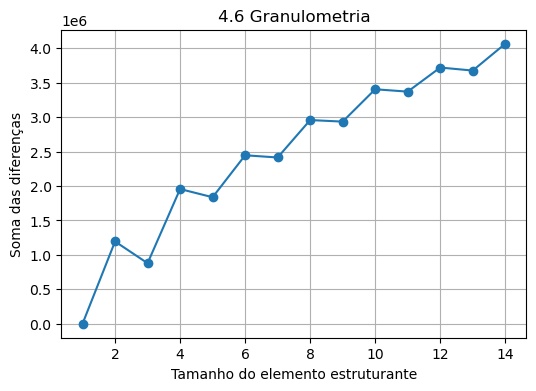

In [16]:
operacoes_morfologicas('img/strawberries.tif')